## <center>Data Analytics</center>
This nootbook is for the **Data Analytics _(CS201)_** project done using various python libraries for data preprocessing and visualisation. The project is done under the supervision of:  
<font color=blue> **Mr. Alok Kumar Agrawal** <br> **Mr. Nitin Verma** </font> <br>
and is done by:<br>
<font color=blue> **Vinayak Saini** <br> **1711981341** </font> <br>

<img src="car.jpg"></img>
### <font color=red>The Dataset</font>
#### Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

**Sources:**

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

**Content**

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

In [4]:
import os as o # For setting working directory.
import pandas as pd # For data preprocessing and stastistical computation.
import numpy as np # For loading data to a pythoon variable
import matplotlib.pyplot as plt # For plotting data 
import seaborn as sns # A layer that works above matplotblib to make plotting easier and graphical friendly.

In [5]:
o.chdir(r'C:\Users\Vinayak\Documents\DA_Project') # Setting up working directory

In [6]:
cars = pd.read_csv('Automobile_data.csv') #  Importing the dataset we have as an excel csv file in a variable named cars

In [7]:
cars.head() # Viewing our imported dataset's first five observations.

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
cars.info() # Observing complete information of our dataset columns: range, type and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null int64
peak-rpm             205 non-null int64
city-mpg             205 non-nu

##### Deleting duplicate rows if any
This is done because duplicate data is not considered good for the analysis

In [9]:
cars = cars.drop_duplicates(keep='first')

In [10]:
cars.shape # Shape method provides the shape of our data i.e., number of rows and columns

(205, 24)

## Summary Statistics
The basic summary statistics helps us in a great way to understand the distribution of the data.
Let's say standard deviation (std), if the std of a variable is 0, that means that variable give us no variation, and that variable is not very useful for analysis, basically we need to get rid of that variable.

#### **Pandas.describe()**
**Syntax:** DataFrame.describe(percentiles=None, include=None, exclude=None)

**Parameters:** 

**percentile:** list like data type of numbers between 0-1 to return the respective percentile

**include:** List of data types to be included while describing dataframe. Default is None

**exclude:** List of data types to be Excluded while describing dataframe. Default is None

**Return type:** Statistical summary of data frame.



In [11]:
cars.describe() 

# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. 
# of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a 
# different output which is shown in the examples below.

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.327610,3.253561,10.142537,106.048780,5131.317073,25.219512,30.751220,13387.731707
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.271271,0.313876,3.972040,43.468803,480.748724,6.542142,6.886443,8025.270901
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16515.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
cars_sort = cars.sort_values(by = 'city-mpg' , ascending=False)  # Sorting data with respect to City-Milage
cars_sort.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
90,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
45,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,21178
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399


## Defining the function to get minimum and maximum values w.r.t any variable
### _We not just get the minimum and maximum values of that variable but also the values of other variables corresponding to that variable_

In [13]:
def min_max_values(col):
    top = cars[col].idxmax()
    top_obs = pd.DataFrame(cars.loc[top])
    
    bottom = cars[col].idxmin()
    bot_obs = pd.DataFrame(cars.loc[bottom])
    
    min_max_obs = pd.concat([top_obs , bot_obs] , axis=1)
    return min_max_obs

## Useing above function for Highway-Milage
This gives the minimum and maximum values for highway-mpg and assosiated values of other variables w.r.t those values.

In [14]:
min_max_values('highway-mpg')

,30,73
make,honda,mercedes-benz
fuel-type,gas,gas
aspiration,std,std
num-of-doors,two,four
body-style,hatchback,sedan
drive-wheels,fwd,rwd
engine-location,front,front
wheel-base,86.6,120.9
length,144.6,208.1
width,63.9,71.7


## Ploting Histogram using matplotlib
_Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin._

To plot a histogram.

Compute and draw the histogram of x. The return value is a tuple (n, bins, patches) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Multiple data can be provided via x as a list of datasets of potentially different length ([x0, x1, ...]), or as a 2-D ndarray in which each column is a dataset. Note that the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <a list of 10 Patch objects>)

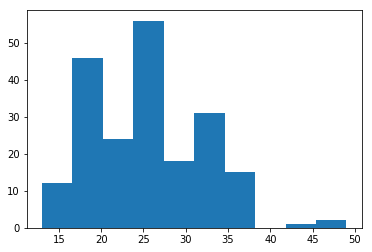

In [15]:
bins = 10 #10 bins means data is distributed amoung 10 sections
plt.hist(cars['city-mpg'],bins)

Values at the 45-50 are the extreme values, these values are away from our normal observations and are totally diffrent.

## Probability density function (pdf)
In this we would be having observations in the percentage terms, as it is the percentage it has to lie between 0 and 1 and the area under the pdf curve is always going to be 1.

C:\Users\Vinayak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


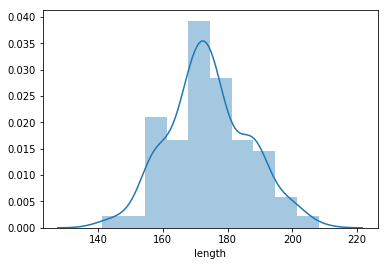

In [16]:
sns.distplot(cars['length'],10)

We can see most of the observations lie near 170 and lesser observations lies at the edges near 140 and 220. 

### _Analysing two variables city milage and highway milage using pdf_
By doing this we can compare two variables at same time along with their maximum, minimum existance

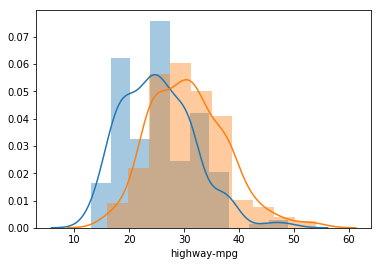

In [17]:
sns.distplot(cars['city-mpg'],10)
sns.distplot(cars['highway-mpg'],10)

## Count and plot by Category

In [18]:
make_dist = cars.groupby('make').size()

In [19]:
make_dist

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
dtype: int64

Here we counted the number of times the paricular type of car existing.
Now we'll plot this as a graph.

### _Plotting make's distribution_

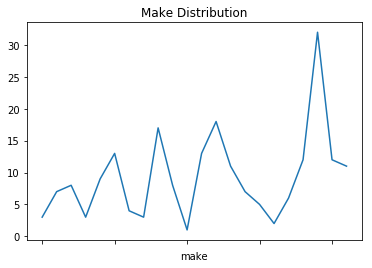

In [20]:
make_dist.plot(title='Make Distribution')

## Selecting and plotting the histogram for all the numerical categories

In [21]:
cars_num = cars.select_dtypes(include=['float64','int64'])
cars_num.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### _Plotting histogram for all numerical categories_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AFF3AB2B0>,
      dtype=object)

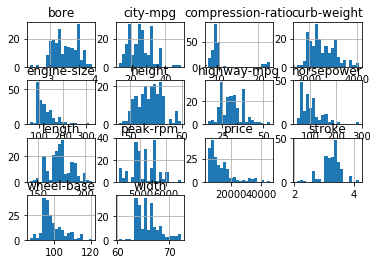

In [22]:
cars_num.hist(bins=20)

## Plotting Heatmap

To plot a heatmap Wwe may start by defining some data. What we need is a 2D list or array which defines the data to color code. We then also need two lists or arrays of categories; of course the number of elements in those lists need to match the data along the respective axes. The heatmap itself is an imshow plot with the labels set to the categories we have. Note that it is important to set both, the tick locations (set_xticks) as well as the tick labels (set_xticklabels), otherwise they would become out of sync. The locations are just the ascending integer numbers, while the ticklabels are the labels to show. Finally we can label the data itself by creating a Text within each cell showing the value of that cell.

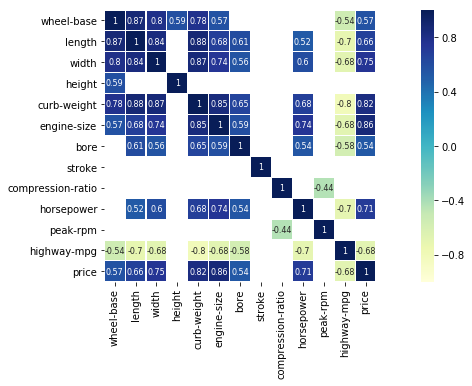

In [24]:
corr = cars_num.drop('city-mpg',axis=1).corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr[(corr >= 0.5) | (corr<=-0.4)], cmap='YlGnBu',vmax=1.0,vmin=-1.0,
            linewidths=0.1,annot=True,annot_kws={"size": 8},square=True);  
#  Plotting Heatmap for city-milage's correlation with all numerical categories

## Box-Plot
### _Here we'll analyse different categories w.r.t city-milage._

### _Make vs Milage_

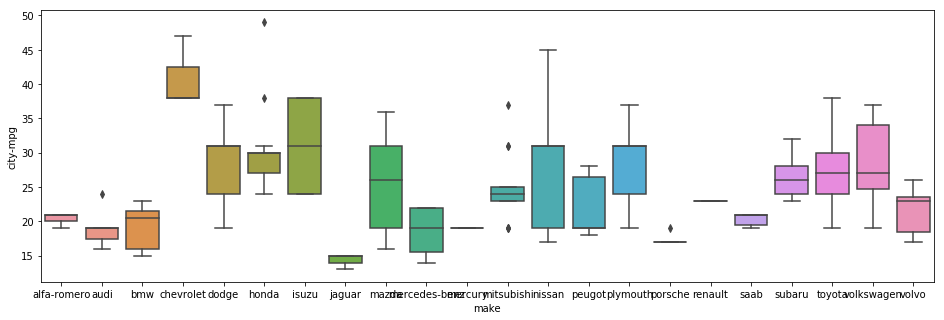

In [25]:
plt.figure(figsize = (16,5))
box1 = sns.boxplot(x='make' , y='city-mpg' , data=cars)

### _Body-style vs Milage_

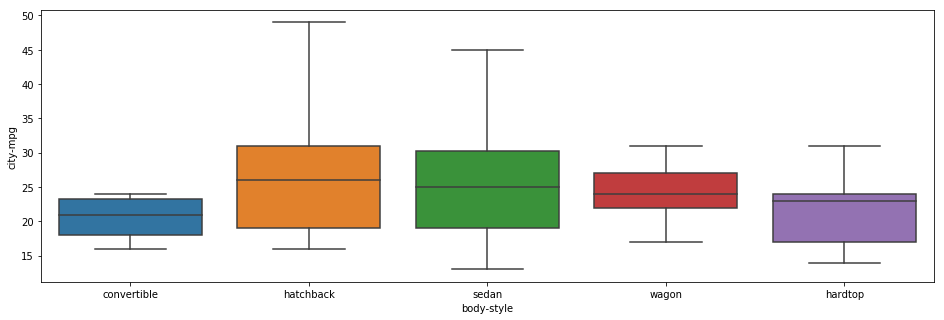

In [26]:
plt.figure(figsize = (16,5))
box1 = sns.boxplot(x='body-style' , y='city-mpg' , data=cars)

### _Engine-type vs Milage_

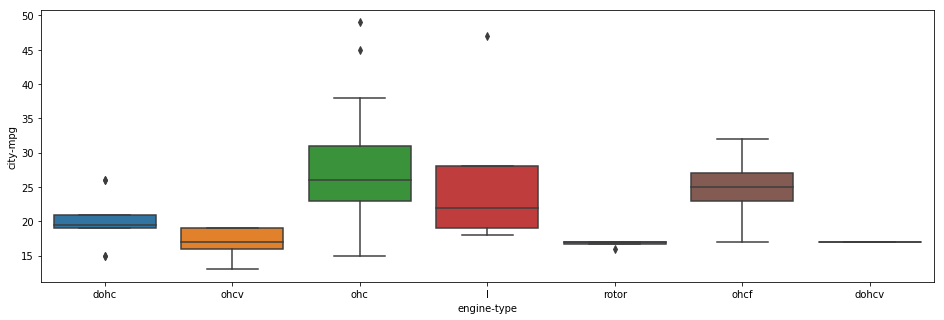

In [27]:
plt.figure(figsize = (16,5))
box1 = sns.boxplot(x='engine-type' , y='city-mpg' , data=cars)

### _Fuel-system vs Milgae_

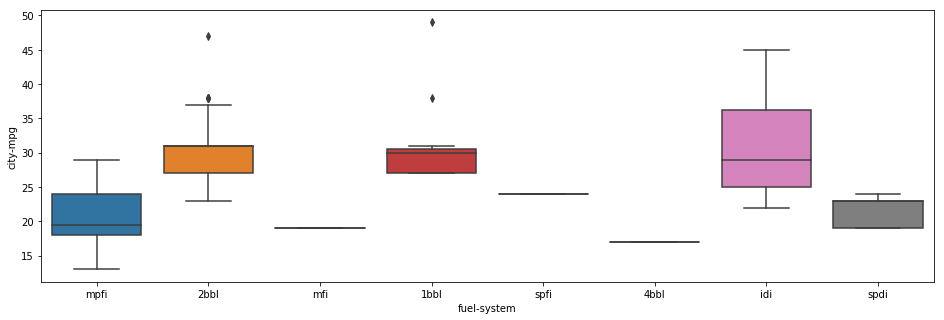

In [28]:
plt.figure(figsize = (16,5))
box1 = sns.boxplot(x='fuel-system' , y='city-mpg' , data=cars)

## _Regression plot_
 _Regression plot detemines weather their is strong or weak relation between two variables. If more variables are near the regression line that means the relationship is strong outherwise the relationship is weak._

C:\Users\Vinayak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


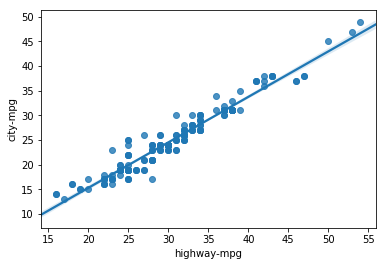

In [29]:
sns.regplot(cars['highway-mpg'] , cars['city-mpg'])

Here we can see all the variables are lying close to regression line therefore their is strong relationship between City andd Highway milage